# Imports


In [12]:
import numpy as np
import os
import glob
import cv2
import seaborn as sns

# To plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To unzip
import tarfile

# Preparing data

In [13]:

url = "./input/classificatie.tar"
destinationpath = os.path.join("input")

def fetch_import_data(musti_input = url, destiation = destinationpath):
  if not os.path.isdir(destiation):
    os.makedirs(destiation)
  
  tgz_path = os.path.join(destiation, "classificatie.tar")
  input_tgz = tarfile.open(tgz_path)
  input_tgz.extractall(path=destiation)
  input_tgz.close()


In [14]:
X = []
y = []
def make_arrays():

  inside = os.path.join("input", "classificatie", "aanwezig")
  outside = os.path.join("input", "classificatie", "buiten")
  nothing = os.path.join("input", "classificatie", "niets")

  images = glob.glob(f"{inside}/*")

  for i in images:
      img = cv2.imread(i)
      x = 1 - cv2.split(img)[0]
      x = np.array(x).ravel().reshape((225280,))
      X.append(x)
      y.append("inside")

  images = glob.glob(f"{outside}/*")

  for i in images:
      img = cv2.imread(i)
      x = 1 - cv2.split(img)[0]
      x = np.array(x).ravel().reshape((225280,))
      X.append(x)
      y.append("outside")

  images = glob.glob(f"{nothing}/*")

  for i in images:
      img = cv2.imread(i)
      x = 1 - cv2.split(img)[0]
      x = np.array(x).ravel().reshape((225280,))
      X.append(x)
      y.append("nothing")
    


make_arrays()

In [15]:

print('# of dims: ',X[0].ndim)     # dimension of an image
print('Img shape: ',X[0].shape)    # shape of an image
print('Dtype: ',X[0].dtype) 
print(X[0])               # pixel value at [R, G, B]

# of dims:  1
Img shape:  (225280,)
Dtype:  uint8
[132 186 141 ... 207 207 207]


In [16]:
np.set_printoptions(linewidth=400)
type(X)

list

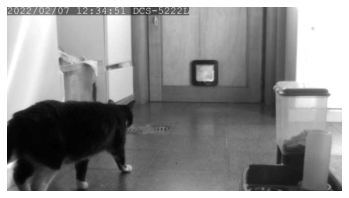

In [17]:
some_inside = X[0]
some_inside_image = some_inside.reshape(352, 640)
plt.imshow(some_inside_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

Check if there are images and labels in the arrays

In [18]:
y[0]

'inside'

Creating trainings- and testsets

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Number of records in X_train and X_test

In [20]:
print(f"X_train: {len(X_train)}")
print(f"X_test: {len(X_test)}")

X_train: 1980
X_test: 660


In [21]:
X_train=np.asarray(X_train)
print(X_train)

[[135 199 137 ... 149 154 159]
 [154 198 161 ... 154 141 133]
 [157 208 155 ... 160 150 144]
 ...
 [144 206 144 ... 151 139 131]
 [142 205 143 ... 145 142 141]
 [113 155 112 ... 165 166 169]]


# Multiclass Classification

## RandomForest


In [22]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)
y_predict = forest_clf.predict(X_test)


### Accuracy

In [23]:
from sklearn.metrics import accuracy_score

print(f'Accuracy: {accuracy_score(y_test, y_predict)}')

Accuracy: 0.95


### Cross validation

In [24]:
# from sklearn.model_selection import cross_val_score

# for k in range(2, 11):
#   scores = cross_val_score(forest_clf, X_train, y_train, cv=k, scoring='accuracy')
#   print(f'K is: {k}\n accuracy_array = {scores}\n mean is {np.mean(scores)}')

In [25]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=5)

conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)

[[ 566   35   38]
 [   7 1041    1]
 [  40    2  250]]


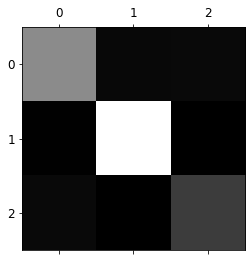

In [26]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

### Relative amount of errors

In [27]:
row_sums = conf_mx.sum(axis=1, keepdims=True)  # returns a 1-dimensional array with row totals
norm_conf_mx = conf_mx / row_sums

The diagonal is filled with zeros to keel only the errors

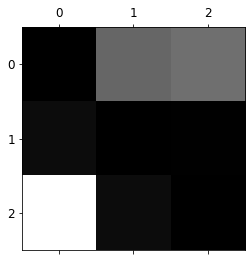

In [28]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()